# Импорт библиотек

In [1]:
import numpy as np
from gzip import open # NB: overrides standard open()
import pickle as pkl
import pandas as pd
import warnings 
from glob import glob
import os
import math
import functools

### Отключим предупреждения Anaconda

In [2]:
warnings.simplefilter('ignore')

# Загрузим данные

In [3]:
Xdata_numpy = pkl.load(open('C:/Users/admin/Desktop/PLS_continue_2020/X.pkl.gz', 'rb'))
Ydata = pkl.load(open('C:/Users/admin/Desktop/PLS_continue_2020/y.pkl.gz', 'rb'))

# N-PLS1

## Выберем столбец у с которым будем работать

In [4]:
m=0

## Посчитаем Z

In [6]:
z=np.zeros([206,55])

In [7]:
for i in range(0,55):
    for j in range(0,206):
        zsum=0
        for k in range(0,35):
            zsum+=Xdata_numpy['X'][k,j,i]*Ydata.iloc[k,m]
        z[j,i]=zsum

In [8]:
z

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        , 30.42741355, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 29.76362119, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 29.36079377, ...,  0.        ,
         0.        ,  0.        ]])

## Разложим Z на вектора W$^{J}_{f}$ и W$^{I}_{f}$

In [10]:
Wk, S, WI = np.linalg.svd(z)

In [16]:
WI.shape

(55, 55)

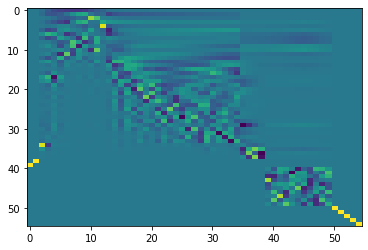

In [19]:
import matplotlib.pyplot as plt
plt.imshow(WI, aspect="auto")
plt.show();

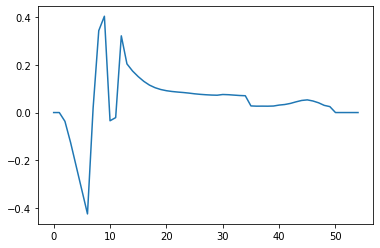

In [22]:
plt.plot(WI[3,:])
plt.show();

# Перейду к подбору нужной комбинации векторов для кронекеровского произведения для весов

In [17]:
T=[]

In [ ]:
for i in range(0,206):
    for j in range(0,55):
        w_k=Wk[i,:]
        w_i=WI[j,:]
        t=[]
        for h in range(0,35):
            t+=[w_k.transpose*Xdata_numpy['X'][h,:,:]*w_i]
        t=np.array([t])
        T+=[t]
        T=np.array([T])